In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('Dataset_Day7.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


In [8]:
df.shape

(768, 7)

In [9]:
df['Outcome'].unique()

array([1, 0])

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# If your y column have categorical feature and want to assign 0 1 value
# use this for e.g: df['species'] = df['species'].map){'versicolor':0,'virginiva':1}

In [17]:
# split the  dataset into inedpendent and dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=203)

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [29]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50], 'max_iter':[100,200,300]}

In [31]:
classifier_regressor = GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [35]:
classifier_regressor.fit(X_train,y_train)

C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------------------

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [36]:
print(classifier_regressor.best_params_)

{'C': 20, 'max_iter': 100, 'penalty': 'l2'}


In [38]:
print(classifier_regressor.best_score_)

0.7840083073727934


In [41]:
# prediction 
y_pred = classifier_regressor.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [43]:
# accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [51]:
score = accuracy_score(y_test,y_pred)
print(score)

0.7532467532467533


In [52]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.83      0.82       159
           1       0.61      0.58      0.60        72

    accuracy                           0.75       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.75      0.75      0.75       231



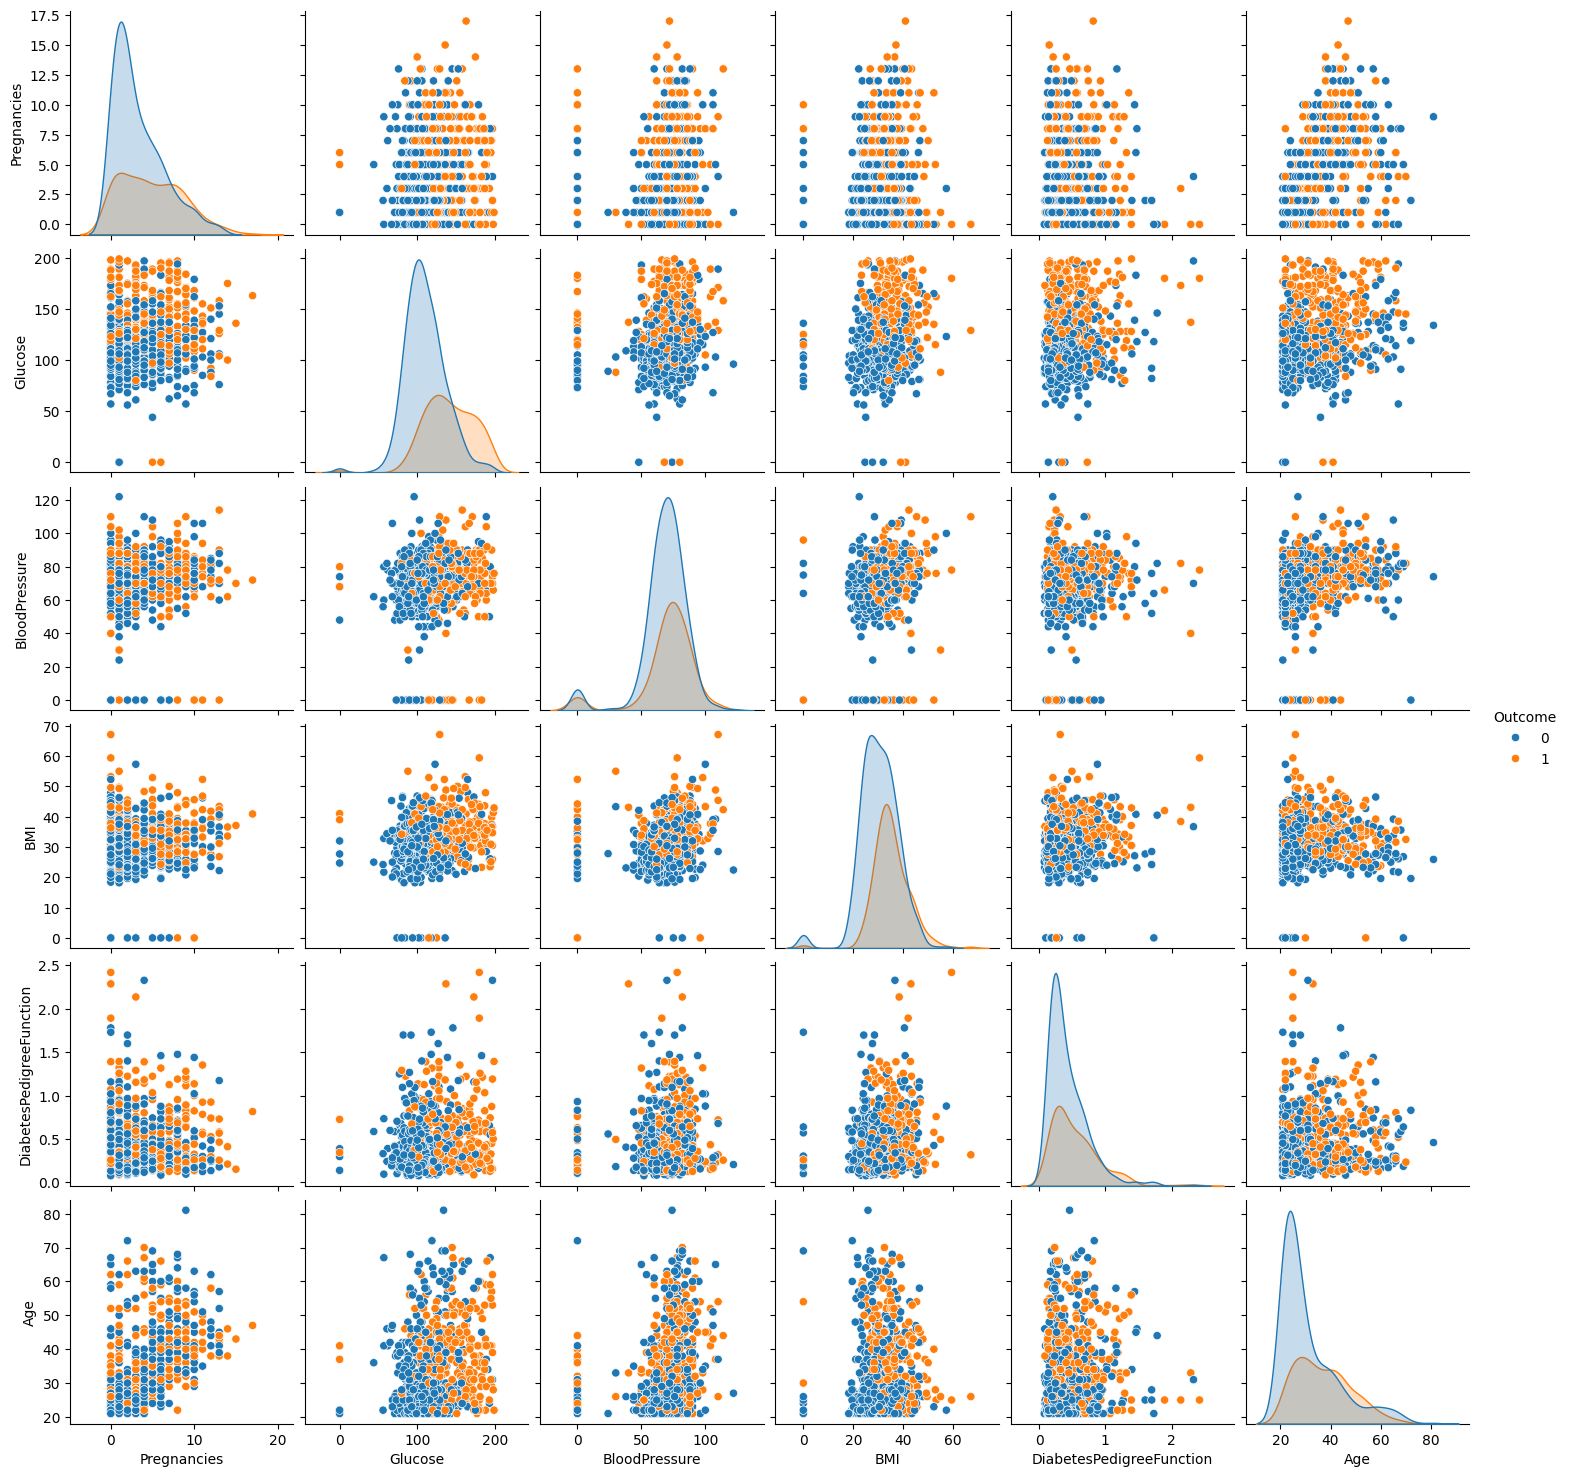

In [48]:
sns.pairplot(df,hue='Outcome')

In [50]:
df.corr()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.281805,0.041265,0.239528,0.065068
BMI,0.017683,0.221071,0.281805,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.292695,0.173844,0.238356,1.000000
